In [1]:
#all imports go here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
from scipy import stats
#from bioinfokit.analys import stat
#from statsmodels.graphics.factorplots import interaction_plot
#res=stat()
pd.set_option("display.max_rows",None)

In [2]:
#develop fake data
random.seed(50)
N = 50
a = [random.gauss(55,20) for x in range(N)]
b = [random.gauss(50,15) for x in range(N)]

Text(0.5, 1.0, 'Two-Sample T-test')

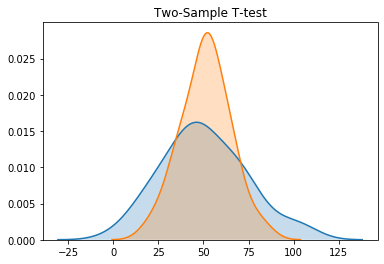

In [3]:
#visualizing
sns.kdeplot(a, shade=True)
sns.kdeplot(b, shade=True)
plt.title("Two-Sample T-test")

In [4]:
#2 sample t test or independent sample 
tStat, pValue = stats.ttest_ind(a, b, equal_var=False)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.8521303420279133 T-Statistic:-0.18700897982039738


In [5]:
#1 sample t-test fake data
N = 30
a = [random.gauss(50,15) for x in range(N)]
popmean = 50.05

In [6]:
#1 sample t-test
tStat, pValue = scipy.stats.ttest_1samp(a, popmean, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.40763145106167975 T-Statistic:0.840270325124658


In [7]:
#fake data for paired t test / related or repeated measures 
N = 30
a = [random.gauss(60,15) for x in range(N)]
b = [random.gauss(60,15) for x in range(N)]

In [8]:
tStat, pValue = scipy.stats.ttest_rel(a, b, axis=0)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.9563562606069609 T-Statistic:0.05520179328444168


In [11]:
datafile = "C:/Users/andjo/Google Drive/_Toronto/Courses/1 - Mon - INF2178  Experimental Design Data Science/inf2178h-w22-exp-design-datascience/data/PlantGrowth.csv"

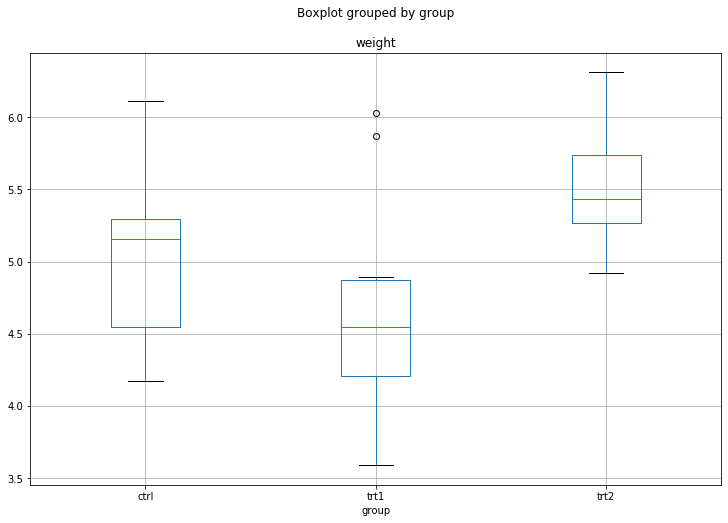

In [12]:
data = pd.read_csv(datafile)

#create boxplot
data.boxplot('weight', by='group',figsize=(12,8))

ctrl = data['weight'][data.group == 'ctrl']

grps = pd.unique(data.group.values)
d_data = {grp:data['weight'][data.group == grp] for grp in grps}

k = len(pd.unique(data.group))
N = len(data.values)
n = data.groupby('group').size()[0]

In [13]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('weight ~ group', data=data).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq    df         F   PR(>F)
group      3.76634   2.0  4.846088  0.01591
Residual  10.49209  27.0       NaN      NaN


In [14]:
#post hoc tests: tukey hsd
#tukey hsd with bonferroni's correction
pair_t = mod.t_test_pairwise('group')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
trt1-ctrl,-0.371,0.278782,-1.330791,0.194388,-0.943013,0.201013,0.194388,False
trt2-ctrl,0.494,0.278782,1.771996,0.087682,-0.078013,1.066013,0.167675,False
trt2-trt1,0.865,0.278782,3.102787,0.004459,0.292987,1.437013,0.013318,True


In [16]:
import pingouin as pg

aov = pg.anova(data=data, dv='weight',between='group',detailed=True)

ModuleNotFoundError: No module named 'pingouin'

In [17]:
print(aov)

NameError: name 'aov' is not defined

In [18]:
#post hoc test with pingouin
#cohen = effect size
pt = pg.pairwise_tukey(dv='weight',between='group',effsize='cohen',data=data)
print(pt)

NameError: name 'pg' is not defined

In [19]:
#ANOVA = systematic variance / unsystematic variance
#OR
#ANOVA = comparing proportion of variance explained between levels of cateogorical variables
#proportion of variance  = sum of squares
#SS_T = total sum of squares
#SS_T = SS_between + SS_within
#SS_between = SS_T - SS_within

In [21]:
#anything beyond a 1 way anova is called a factorial anova
#don't go beyond a 2 way anova.
#bias-variance tradeoff

d = pd.read_csv("C:/Users/andjo/Google Drive/_Toronto/Courses/1 - Mon - INF2178  Experimental Design Data Science/inf2178h-w22-exp-design-datascience/data/twowayanova.txt", sep="\t")

d.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


In [22]:
d_melt = pd.melt(d, id_vars=['Genotype'], value_vars=['1_year','2_year','3_year'])

d_melt.columns = ['Genotype', 'years', 'value']

d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


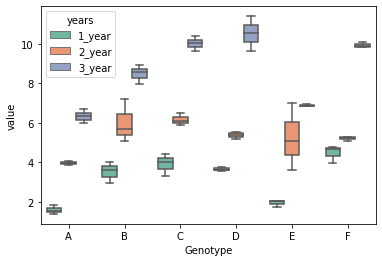

In [23]:
#exploratory data analysis
sns.boxplot(x="Genotype", y="value", hue="years", data=d_melt, palette="Set2")

In [24]:
#doing 2 way anovas with statsmodels
model = ols('value ~ C(Genotype) + C(years) + C(Genotype):C(years)', data=d_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Genotype),58.551733,5.0,32.748581,1.931655e-12
C(years),278.925633,2.0,390.014868,4.006243e-25
C(Genotype):C(years),17.122967,10.0,4.788525,2.230094e-04
Residual,12.873000,36.0,NaN,NaN


In [ ]:
#bioinfokit
#res = stat()
#res.anova_stat(df=d_melt, res_var='value', anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.anova_summary

In [25]:
#interaction plot
fig = interaction_plot(x=d_melt['Genotype'], trace=d_melt['years'], response=d_melt['value'])

plt.show()

NameError: name 'interaction_plot' is not defined

In [ ]:
#res=stat()
#res.tukey_hsd(df=d_melt, res_var='value', xfac_var='Genotype',anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.tukey_summary

In [ ]:
#res=stat()
#res.tukey_hsd(df=d_melt, res_var='value', xfac_var='years',anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.tukey_summary

In [ ]:
#res=stat()
#res.tukey_hsd(df=d_melt, res_var='value', xfac_var=['Genotype','years'],anova_model='value ~ C(Genotype) + C(years) + C(Genotype):C(years)')
#res.tukey_summary

In [27]:
#simple and multiple linear regressions
dataset = pd.read_csv("C:/Users/andjo/Google Drive/_Toronto/Courses/1 - Mon - INF2178  Experimental Design Data Science/inf2178h-w22-exp-design-datascience/data/student_scores.csv")

In [28]:
dataset.shape

(25, 2)

In [29]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


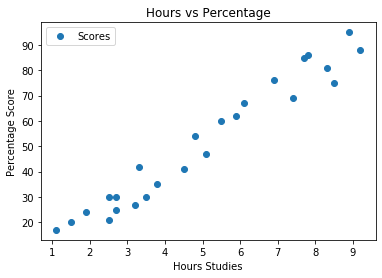

In [31]:
#plotting
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studies')
plt.ylabel('Percentage Score')
plt.show()

In [32]:
#building regression
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print(regressor.intercept_)

2.018160041434683


In [36]:
print(regressor.coef_)

[9.91065648]


In [37]:
#making predictions
y_pred = regressor.predict(X_test)

In [38]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [39]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 4.183859899002975
MSE: 21.5987693072174
RMSE: 4.6474476121003665


In [40]:
#MLR
dataset = pd.read_csv('C:/Users/andjo/Google Drive/_Toronto/Courses/1 - Mon - INF2178  Experimental Design Data Science/inf2178h-w22-exp-design-datascience/data/petrol_consumption.csv')

In [41]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [42]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [43]:
X = dataset[['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']]
y = dataset['Petrol_Consumption']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [47]:
y_pred = regressor.predict(X_test)

In [48]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [49]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 56.822247478964684
MSE: 4666.3447875883585
RMSE: 68.31064915215165


In [52]:
#ANCOVA example
df = pd.read_csv("C:/Users/andjo/Google Drive/_Toronto/Courses/1 - Mon - INF2178  Experimental Design Data Science/inf2178h-w22-exp-design-datascience/data/ancova_data.csv")
df.head(5)

,genotype,height,yield
0,A,10.0,20.0
1,A,11.5,22.0
2,A,12.0,24.0
3,A,12.9,24.0
4,A,13.4,26.0


In [56]:
from dfply import *

ModuleNotFoundError: No module named 'dfply'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fix, axs = plt.subplots(ncols=3)
sns.scatterplot(data=df,x="height", y = "yield", hue = df.genotype.tolist(),)